# Key factors that influence US home prices *nationally*
Developing a data science model to analyze the primary factors affecting the national housing prices in the United States over the past two decades using the S&P Case-Shiller Home Price Index as a representation of home prices.

![image](factors-affecting-house-prices.jpg)

The dataset encompasses critical factors that have the potential to impact residential home prices over the past two decades in the United States. These factors can be broadly categorized into two groups: Supply and Demand.

The S&P Case-Shiller Housing Price Index (CSUSHPISA) chosen as the dependent variable, serving as an indicator of price fluctuations.

# 1. Data Cleaning and handling missing values

In [78]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Importing dataset
sup = pd.read_csv("supply.csv")
dem = pd.read_csv("demand.csv")

The supply dataset contains columns that indicate:
- DATE: Date of the data point.
- CSUSHPISA: S&P Case-Shiller Housing Price Index for residential properties.
- MSACSR: Monthly Supply of New Houses in the United States.
- PERMIT: Number of residential building permits issued.
- TLRESCONS: Total residential construction expenditure or cost.
- EVACANTUSQ176N: Number of vacant housing units in the United States.

The demand dataset contains columns that indicate:
- DATE: Date of the data point.
- CSUSHPISA: S&P Case-Shiller Housing Price Index for residential properties.
- MORTGAGE30US: 30-Year Fixed-Rate Mortgage Average in the United States.
- UMCSENT: University of Michigan Consumer Sentiment Index.
- INTDSRUSM193N: Effective Federal Funds Rate (Interest Rate).
- MSPUS: Median Sales Price of Houses Sold in the United States.
- GDP: Gross Domestic Product of the United States.

In [80]:
# Merging both dataset
df = sup.merge(dem,on='DATE')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            81 non-null     object 
 1   CSUSHPISA_x     81 non-null     object 
 2   MSACSR          81 non-null     object 
 3   PERMIT          81 non-null     object 
 4   TLRESCONS       81 non-null     object 
 5   EVACANTUSQ176N  81 non-null     object 
 6   CSUSHPISA_y     80 non-null     float64
 7   MORTGAGE30US    81 non-null     float64
 8   UMCSENT         81 non-null     float64
 9   INTDSRUSM193N   74 non-null     float64
 10  MSPUS           81 non-null     int64  
 11  GDP             81 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 8.2+ KB


In [81]:
df.drop(columns = ['CSUSHPISA_y'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            81 non-null     object 
 1   CSUSHPISA_x     81 non-null     object 
 2   MSACSR          81 non-null     object 
 3   PERMIT          81 non-null     object 
 4   TLRESCONS       81 non-null     object 
 5   EVACANTUSQ176N  81 non-null     object 
 6   MORTGAGE30US    81 non-null     float64
 7   UMCSENT         81 non-null     float64
 8   INTDSRUSM193N   74 non-null     float64
 9   MSPUS           81 non-null     int64  
 10  GDP             81 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 7.6+ KB


In [82]:
#rename the column

df.rename(columns={'CSUSHPISA_x':'Home_price_index','MSACSR':'Monthly_supply','PERMIT':'Permit'\
                   ,'TLRESCONS':'Total_consumption spending'
                  ,'EVACANTUSQ176N':'Housing_inventory','MORTGAGE30US':'30y_mortgage','UMCSENT':'Consumer_sentiment'\
                   ,'INTDSRUSM193N':'Interest_rates','MSPUS':'Median_sales_price','DATE':'Date'},inplace = True)

In [83]:
df.head()

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,1/1/2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,1/4/2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,1/7/2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,1/10/2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,1/1/2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [84]:
from sklearn.linear_model import LinearRegression

# Assuming 'df_complete' contains the complete data
X = df[['Median_sales_price', 'GDP']]  # Replace with your actual predictor columns
y = df['Interest_rates']
test_size = 7

# Split the data into training and test sets
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]
# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [85]:
df_pred = model.predict(X_test)
df_pred = pd.DataFrame(df_pred, columns=['Predicted_Interest'])
df_pred

,Predicted_Interest
0,2.647884
1,2.525346
2,2.629083
3,2.948787
4,3.417219
5,3.596288
6,1.260070


In [86]:
modified_df = df.copy()

nan_indices = modified_df[modified_df['Interest_rates'].isna()].index

# Replace NaN values in 'Interest_rates' with predicted values using the indices
modified_df.loc[nan_indices, 'Interest_rates'] = df_pred['Predicted_Interest'].values
# Replace "." with "X" in the 'Column_Name'
modified_df.tail()

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
76,1/1/2022,290.868,6.233333333,1864,910611,15166,3.822308,63.133333,2.629083,433100,24740.480
77,1/4/2022,303.4226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,2.948787,449300,25248.476
78,1/7/2022,301.7263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,3.417219,468000,25723.941
79,1/10/2022,297.8966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,3.596288,479500,26137.992
80,1/1/2023,.,8.033333333,1424.333333,842559.6667,15053,6.372308,64.633333,1.260070,436800,26465.865


In [87]:
modified_df['Home_price_index'] = df['Home_price_index'].str.replace('.', '296.601')
modified_df.tail()

C:\Users\SabahatAnsari\AppData\Local\Temp\ipykernel_12936\648093334.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  modified_df['Home_price_index'] = df['Home_price_index'].str.replace('.', '296.601')


,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
76,1/1/2022,290296.601868,6.233333333,1864,910611,15166,3.822308,63.133333,2.629083,433100,24740.480
77,1/4/2022,303296.6014226667,8.7,1734.666667,947300.3333,15286,5.266154,57.866667,2.948787,449300,25248.476
78,1/7/2022,301296.6017263333,9.566666667,1610.666667,910346,15306,5.623077,56.100000,3.417219,468000,25723.941
79,1/10/2022,297296.6018966667,9.2,1455.333333,870620.6667,14554,6.664615,58.800000,3.596288,479500,26137.992
80,1/1/2023,296.601,8.033333333,1424.333333,842559.6667,15053,6.372308,64.633333,1.260070,436800,26465.865


In [88]:
csv_file_path = 'modified_data.csv'

# Export 'modified_df' to a CSV file
modified_df.to_csv(csv_file_path, index=False)

In [89]:
#converting into mumerical standard data where float data type and upto decimal 1 using .round(1)
df = pd.read_csv('modified_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Home_price_index'] = df['Home_price_index'].astype(float).round(1)
df['Monthly_supply']=df['Monthly_supply'].astype(float).round(1)
df['Permit']=df['Permit'].astype(float).round(1)
df['Total_consumption spending']=df['Total_consumption spending'].astype(float).round(1)
df['Housing_inventory']=df['Housing_inventory'].astype(float).round(1)
df['30y_mortgage']=df['30y_mortgage'].astype(float).round(1)
df['Consumer_sentiment']=df['Consumer_sentiment'].astype(float).round(1)
df['Interest_rates']=df['Interest_rates'].astype(float).round(1)
df['Median_sales_price']=df['Median_sales_price'].astype(float).round(1)
df['GDP']=df['GDP'].astype(float).round(1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        81 non-null     datetime64[ns]
 1   Home_price_index            81 non-null     float64       
 2   Monthly_supply              81 non-null     float64       
 3   Permit                      81 non-null     float64       
 4   Total_consumption spending  81 non-null     float64       
 5   Housing_inventory           81 non-null     float64       
 6   30y_mortgage                81 non-null     float64       
 7   Consumer_sentiment          81 non-null     float64       
 8   Interest_rates              81 non-null     float64       
 9   Median_sales_price          81 non-null     float64       
 10  GDP                         81 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 7.1 KB


In [90]:
df.head()

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129296.6,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,2003-01-04,131296.6,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,2003-01-07,135296.6,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,2003-01-10,138296.6,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,2004-01-01,143296.6,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


# 2. Data Visualization

<Axes: xlabel='Date', ylabel='Monthly_supply'>

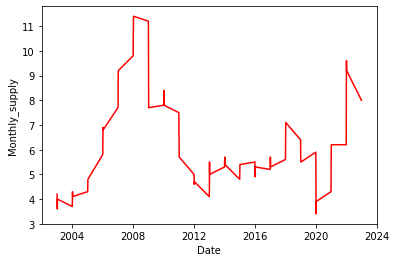

In [98]:
import seaborn as sns
sns.lineplot(data=df,x='Date',y='Monthly_supply',color='red',)
# this plot shows the monthly supply over the last 20 years
